# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Ashim Izzuddin
- **Email:** muhammadashimizzuddin@gmail.com
- **ID Dicoding:** ashim_izzuddin

## Menentukan Pertanyaan Bisnis

- Bagaimana pola pembelian pelanggan berdasarkan lokasi geografis di Brazil dari waktu ke waktu, dan area mana yang memiliki nilai transaksi tertinggi?
- Bagaimana performa penjual berdasarkan lokasi, jumlah pesanan, dan nilai penjualan, serta penjual dari negara bagian mana yang memiliki tingkat kepuasan pelanggan tertinggi?
- Bagaimana korelasi antara metode pembayaran, jumlah cicilan, dan nilai transaksi, serta metode pembayaran apa yang paling populer di berbagai negara bagian?
- Berdasarkan analisis RFM, bagaimana segmentasi pelanggan dapat membantu strategi pemasaran yang lebih personal, dan karakteristik apa yang dimiliki oleh pelanggan dengan nilai tertinggi?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
from datetime import datetime
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

Membaca dataset cusomers

In [2]:
df_customers=pd.read_csv('data\customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Membaca dataset geolocation

In [3]:
df_geolocation=pd.read_csv('data\geolocation_dataset.csv')
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Membaca dataset order items

In [4]:
df_order_items=pd.read_csv('data\order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Membaca dataset order payments

In [5]:
df_order_payments=pd.read_csv('data\order_payments_dataset.csv')
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Membaca dataset order reviews

In [6]:
df_order_reviews=pd.read_csv('data\order_reviews_dataset.csv')
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Membaca dataset orders

In [7]:
df_orders=pd.read_csv('data\orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Membaca dataset product category

In [8]:
df_product_category=pd.read_csv('data\product_category_name_translation.csv')
df_product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Membaca dataset products

In [9]:
df_products=pd.read_csv('data\products_dataset.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Membaca dataset sellers

In [10]:
df_sellers=pd.read_csv('data\sellers_dataset.csv')
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Melihat info setiap dataframe

In [11]:
df_products.info()
df_geolocation.info()
df_order_items.info()
df_order_payments.info()
df_order_reviews.info()
df_orders.info()
df_product_category.info()
df_products.info()
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       -------

Mengecek data null pada setiap dataframe

In [12]:
print(f'Info data null customers:          \n{df_customers.isna().sum()}\n'
      f'\nInfo data null geolocation:      \n{df_geolocation.isna().sum()}\n'
      f'\nInfo data null order items:      \n{df_order_items.isna().sum()}\n'
      f'\nInfo data null order payments:   \n{df_order_payments.isna().sum()}\n'
      f'\nInfo data null order reviews:    \n{df_order_reviews.isna().sum()}\n'
      f'\nInfo data null orders:           \n{df_orders.isna().sum()}\n'
      f'\nInfo data null product category: \n{df_product_category.isna().sum()}\n'
      f'\nInfo data null products:         \n{df_products.isna().sum()}\n'
      f'\nInfo data null sellers:          \n{df_sellers.isna().sum()}\n'
)

Info data null customers:          
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Info data null geolocation:      
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Info data null order items:      
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Info data null order payments:   
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Info data null order reviews:    
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_messa

Mengecek data duplikat

In [13]:
print(f'Total duplicate customers        = {df_customers.duplicated().sum()}\n'
      f'Total duplicate geolocation      = {df_geolocation.duplicated().sum()}\n'
      f'Total duplicate order items      = {df_order_items.duplicated().sum()}\n'
      f'Total duplicate order payments   = {df_order_payments.duplicated().sum()}\n'
      f'Total duplicate order review     = {df_order_reviews.duplicated().sum()}\n'
      f'Total duplicate order            = {df_orders.duplicated().sum()}\n'
      f'Total duplicate products         = {df_products.duplicated().sum()}\n'
      f'Total duplicate seller           = {df_sellers.duplicated().sum()}\n'
      f'Total duplicate product category = {df_product_category.duplicated().sum()}\n'
      )

Total duplicate customers        = 0
Total duplicate geolocation      = 261831
Total duplicate order items      = 0
Total duplicate order payments   = 0
Total duplicate order review     = 0
Total duplicate order            = 0
Total duplicate products         = 0
Total duplicate seller           = 0
Total duplicate product category = 0



Mendeskripsikan masing-masing dataframe

In [14]:
df_customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [15]:
df_geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [16]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [17]:
df_order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [18]:
df_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [19]:
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [20]:
df_product_category.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [21]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [22]:
df_sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

Mengubah kolom-kolom yang berisi tanggal dan jam dari tipe data object atau string menjadi tipe data datetime

In [23]:
order_items_col=['shipping_limit_date']
for col in order_items_col:
    df_order_items[col]=pd.to_datetime(df_order_items[col])

In [24]:
order_reviews_col=['review_creation_date', 'review_answer_timestamp']
for col in order_reviews_col:
    df_order_reviews[col]=pd.to_datetime(df_order_reviews[col])

In [25]:
orders_col=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date']
for col in orders_col:
    df_orders[col]=pd.to_datetime(df_orders[col])

Menghapus data duplikat

In [26]:
df_geolocation.duplicated().sum()

np.int64(261831)

In [27]:
df_geolocation.drop_duplicates(inplace=True)

In [28]:
df_geolocation.duplicated().sum()

np.int64(0)

Membersihkan data null pada df_order_reviews

In [29]:
df_order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Mengganti nilai column review_comment_title & review_comment_message yang memiliki nilai null dengan string "Not Available"

In [30]:
df_order_reviews["review_comment_title"] = df_order_reviews["review_comment_title"].fillna("Not Available")
df_order_reviews["review_comment_message"] = df_order_reviews["review_comment_message"].fillna("Not Available")

Mengecek kembali jumlah nilai null pada df order review setelah di cleaning

In [31]:
df_order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Pada df_orders, kolom yang berisi nilai null terletak pada kolom yang memiliki tipedata datetime. Jika menggantinya ke nilai yang lain, maka tipedata kolom tersebut akan berubah ke object, sehingga pada tahap ini saya tidak mengubahnya dan membiarkan nilai null tersebut karena bisa saja baris tuple tersebut memiliki sesuatu yang penting

In [32]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [33]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Pada df_products, hampir semua kolom memiliki nilai null, kecuali product_id. Pada kolom product_category_name bertipe data object, artinya kita tidak bisa mengisi NaN tersebut dengan metode imputation atau interpolation, maka biarkan berisi NaN. Tetapi pada kolom yang lain, digunakan metode median imputation untuk mengisi nilai null pada kolom tersebut.

In [34]:
df_products['product_name_lenght']        = df_products['product_name_lenght'].fillna(df_products['product_name_lenght'].median())
df_products['product_description_lenght'] = df_products['product_description_lenght'].fillna(df_products['product_description_lenght'].median())
df_products['product_photos_qty']         = df_products['product_photos_qty'].fillna(df_products['product_photos_qty'].median())
df_products['product_weight_g']           = df_products['product_weight_g'].fillna(df_products['product_weight_g'].median())
df_products['product_length_cm']          = df_products['product_length_cm'].fillna(df_products['product_length_cm'].median())
df_products['product_height_cm']          = df_products['product_height_cm'].fillna(df_products['product_height_cm'].median())
df_products['product_width_cm']           = df_products['product_width_cm'].fillna(df_products['product_width_cm'].median())


In [35]:
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght             0
product_description_lenght      0
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

## Exploratory Data Analysis (EDA)


### Explore df_customers

In [36]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [37]:
df_customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [38]:
df_customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


## Visualization & Explanatory Analysis

## Pertanyaan ke 1 : Bagaimana pola pembelian pelanggan berdasarkan lokasi geografis di Brazil dari waktu ke waktu, dan area mana yang memiliki nilai transaksi tertinggi ?


Menggabungkan dataframe pesanan (df_orders) dengan dataframe pelanggan (df_customers) berdasarkan customer_id untuk menghubungkan informasi pesanan dengan data lokasi pelanggan.

In [39]:
# Menggabungkan data pelanggan dan pesanan
customer_orders = pd.merge(df_orders, df_customers, on='customer_id')

- Mengelompokkan item pesanan berdasarkan order_id
- Menghitung jumlah harga produk (price) dan biaya pengiriman (freight_value) untuk setiap pesanan
- Membuat kolom total_value yang merupakan total nilai transaksi (harga produk + biaya pengiriman)

In [40]:
# Menggabungkan data pesanan dan order_items untuk mendapatkan nilai transaksi
order_values = df_order_items.groupby('order_id').agg({'price': 'sum', 'freight_value': 'sum'}).reset_index()
order_values['total_value'] = order_values['price'] + order_values['freight_value']

Menggabungkan informasi customer dan nilai transaksi menjadi satu dataframe komprehensif

In [41]:
# Menggabungkan dengan customer_orders
geo_orders = pd.merge(customer_orders, order_values, on='order_id')

- Mengelompokkan data berdasarkan customer_state (negara bagian)
- Menghitung jumlah pesanan dan total nilai transaksi per negara bagian

In [42]:
# Analisis transaksi per negara bagian
state_orders = geo_orders.groupby('customer_state').agg({
    'order_id': 'count',
    'total_value': 'sum'
}).reset_index()
state_orders.columns = ['State', 'Order Count', 'Total Value']
state_orders = state_orders.sort_values('Total Value', ascending=False)
print("\n===== ANALISIS POLA PEMBELIAN BERDASARKAN LOKASI GEOGRAFIS =====")
print("\nTotal nilai transaksi per negara bagian (Top 10):")
print(state_orders.head(10))


===== ANALISIS POLA PEMBELIAN BERDASARKAN LOKASI GEOGRAFIS =====

Total nilai transaksi per negara bagian (Top 10):
   State  Order Count  Total Value
25    SP        41375   5921678.12
18    RJ        12762   2129681.98
10    MG        11544   1856161.49
22    RS         5432    885826.76
17    PR         4998    800935.44
4     BA         3358    611506.67
23    SC         3612    610213.60
6     DF         2125    353229.44
8     GO         2007    347706.93
7     ES         2025    324801.91


- Membuat kolom order_month untuk analisis berdasarkan bulan
- Mengelompokkan data berdasarkan bulan dan negara bagian untuk melihat tren temporal

In [43]:
# Analisis pola pembelian dari waktu ke waktu
geo_orders['order_month'] = geo_orders['order_purchase_timestamp'].dt.to_period('M')
monthly_state_orders = geo_orders.groupby(['order_month', 'customer_state']).agg({
    'order_id': 'count',
    'total_value': 'sum'
}).reset_index()

# Mengambil 5 negara bagian dengan nilai transaksi tertinggi
top_states = state_orders.head(5)['State'].tolist()
print("\n===== ANALISIS POLA PEMBELIAN BERDASARKAN LOKASI GEOGRAFIS =====")
print(f"\nTrend pembelian bulanan untuk 5 negara bagian dengan nilai transaksi tertinggi: {top_states}")
for state in top_states:
    state_monthly = monthly_state_orders[monthly_state_orders['customer_state'] == state]
    state_monthly = state_monthly.sort_values('order_month')
    print(f"\nState: {state}")
    print(state_monthly.head())


===== ANALISIS POLA PEMBELIAN BERDASARKAN LOKASI GEOGRAFIS =====

Trend pembelian bulanan untuk 5 negara bagian dengan nilai transaksi tertinggi: ['SP', 'RJ', 'MG', 'RS', 'PR']

State: SP
    order_month customer_state  order_id  total_value
2       2016-09             SP         1       143.46
23      2016-10             SP       109     16486.34
47      2017-01             SP       295     46942.77
74      2017-02             SP       633     89887.72
101     2017-03             SP       998    154613.07

State: RJ
    order_month customer_state  order_id  total_value
17      2016-10             RJ        49     12347.60
41      2017-01             RJ        96     14747.45
67      2017-02             RJ       246     38120.86
94      2017-03             RJ       391     64082.61
120     2017-04             RJ       334     65036.56

State: MG
    order_month customer_state  order_id  total_value
10      2016-10             MG        40      5620.55
33      2017-01             MG   

- Mengelompokkan data berdasarkan negara bagian dan kota
- Menghitung jumlah pesanan dan total nilai transaksi per kota

In [44]:
# Analisis kota dengan nilai transaksi tertinggi
city_orders = geo_orders.groupby(['customer_state', 'customer_city']).agg({
    'order_id': 'count',
    'total_value': 'sum'
}).reset_index()
city_orders = city_orders.sort_values('total_value', ascending=False)
print("\n===== ANALISIS POLA PEMBELIAN BERDASARKAN LOKASI GEOGRAFIS =====")
print("\nKota dengan nilai transaksi tertinggi (Top 10):")
print(city_orders.head(10))


===== ANALISIS POLA PEMBELIAN BERDASARKAN LOKASI GEOGRAFIS =====

Kota dengan nilai transaksi tertinggi (Top 10):
     customer_state   customer_city  order_id  total_value
4166             SP       sao paulo     15402   2170227.12
2782             RJ  rio de janeiro      6834   1154234.02
1059             MG  belo horizonte      2750    416733.39
600              DF        brasilia      2116    352305.14
2402             PR        curitiba      1510    244739.87
3201             RS    porto alegre      1372    224064.09
371              BA        salvador      1238    216772.40
3720             SP        campinas      1429    212541.70
3827             SP       guarulhos      1178    163575.82
2753             RJ         niteroi       845    137919.38


Dari analisis diatas, didapatkan insight tentang dominasi SP (São Paulo), distribusi nilai transaksi per negara bagian dan kota, serta pola temporal pembelian.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Gabungkan dataframe yang dibutuhkan
customer_orders = pd.merge(df_orders, df_customers, on='customer_id')
order_values = df_order_items.groupby('order_id').agg({'price': 'sum', 'freight_value': 'sum'}).reset_index()
order_values['total_value'] = order_values['price'] + order_values['freight_value']
geo_orders = pd.merge(customer_orders, order_values, on='order_id')

# Visualisasi 1: Choropleth Map untuk Total Nilai Transaksi per Negara Bagian
state_orders = geo_orders.groupby('customer_state').agg({'total_value': 'sum'}).reset_index()
fig = px.choropleth(
    state_orders,
    geojson="https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson",
    locations='customer_state',
    featureidkey="properties.sigla",
    color='total_value',
    color_continuous_scale="Viridis",
    title="Total Nilai Transaksi per Negara Bagian di Brazil"
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [46]:
# Visualisasi 2: Time Series untuk Tren Pembelian per Bulan
geo_orders['order_month'] = geo_orders['order_purchase_timestamp'].dt.to_period('M')
monthly_state_orders = geo_orders.groupby(['order_month', 'customer_state']).agg({'total_value': 'sum'}).reset_index()
top_states = geo_orders.groupby('customer_state')['total_value'].sum().sort_values(ascending=False).head(5).index
# Convert 'order_month' to string before plotting
monthly_state_orders['order_month'] = monthly_state_orders['order_month'].astype(str)
fig = px.line(
    monthly_state_orders[monthly_state_orders['customer_state'].isin(top_states)],
    x='order_month',
    y='total_value',
    color='customer_state',
    title="Tren Pembelian per Bulan untuk 5 Negara Bagian Teratas"
)
fig.show()

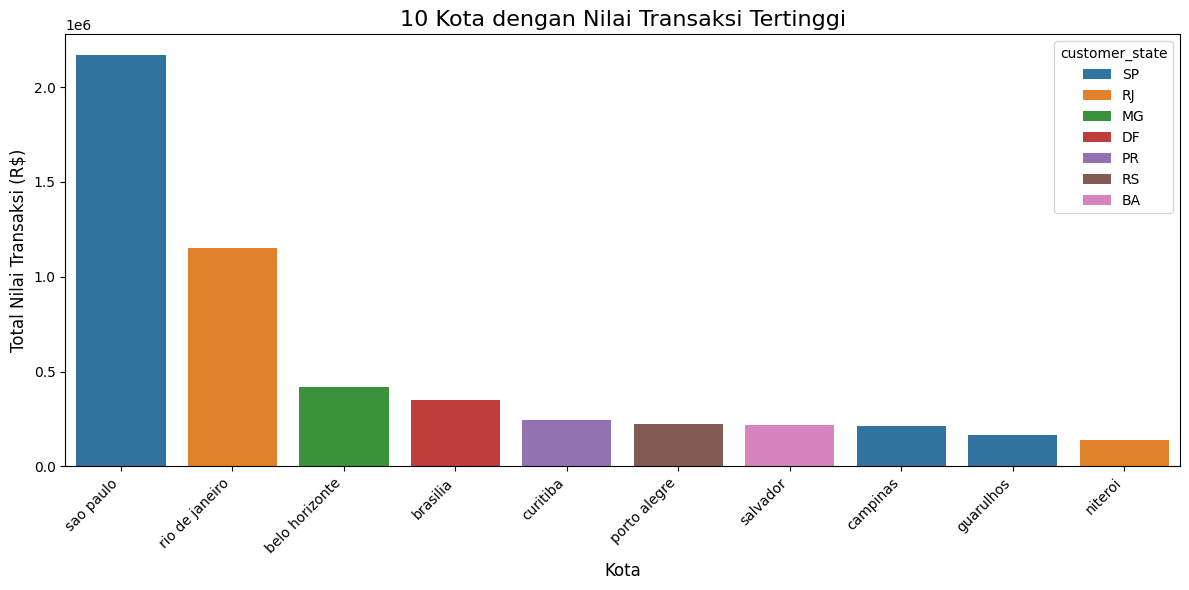

In [47]:
# Visualisasi 3: Bar Chart untuk Kota dengan Nilai Transaksi Tertinggi
city_orders = geo_orders.groupby(['customer_state', 'customer_city']).agg({'total_value': 'sum'}).reset_index()
city_orders = city_orders.sort_values('total_value', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_city', y='total_value', data=city_orders, hue='customer_state', dodge=False)
plt.title('10 Kota dengan Nilai Transaksi Tertinggi', fontsize=16)
plt.xlabel('Kota', fontsize=12)
plt.ylabel('Total Nilai Transaksi (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Bagaimana pola pembelian pelanggan berdasarkan lokasi geografis di Brazil dari waktu ke waktu, dan area mana yang memiliki nilai transaksi tertinggi?**

- Dominasi São Paulo (SP): SP mendominasi nilai transaksi e-commerce di Brazil, menunjukkan konsentrasi ekonomi yang kuat di wilayah tenggara.
- Tren Temporal: Nilai transaksi di SP menunjukkan pertumbuhan konsisten dengan lonjakan di akhir 2017 dan awal 2018. Negara bagian lain memiliki pertumbuhan stabil dengan nilai transaksi yang lebih rendah.
- Konsentrasi di Kota Besar: Pola pembelian terkonsentrasi di kota-kota besar seperti São Paulo dan Rio de Janeiro.
- Penurunan di September 2018: Terdapat penurunan signifikan nilai transaksi di semua negara bagian pada September 2018, yang mungkin mengindikasikan faktor musiman atau artefak data.

## Pertanyaan ke - 2 : Bagaimana performa penjual berdasarkan lokasi, jumlah pesanan, dan nilai penjualan, serta penjual dari negara bagian mana yang memiliki tingkat kepuasan pelanggan tertinggi?

Menggabungkan informasi item pesanan dengan data penjual berdasarkan seller_id



In [48]:
# Menggabungkan data penjual dengan order_items
seller_orders = pd.merge(df_order_items, df_sellers, on='seller_id')

- Menggabungkan data pesanan dengan ulasan pelanggan
- Kemudian menggabungkan data penjual dengan ulasan untuk menganalisis performa penjual

In [49]:
# Menggabungkan dengan reviews
seller_reviews = pd.merge(df_orders[['order_id']], df_order_reviews[['order_id', 'review_score']], on='order_id')
seller_performance = pd.merge(seller_orders, seller_reviews, on='order_id', how='left')

- Mengelompokkan data berdasarkan negara bagian penjual
- Menghitung jumlah pesanan, total nilai penjualan, dan statistik ulasan (rata-rata dan jumlah) per negara bagian

In [50]:
# Analisis performa penjual berdasarkan lokasi
seller_state_performance = seller_performance.groupby('seller_state').agg({
    'order_id': 'count',
    'price': 'sum',
    'review_score': ['mean', 'count']
}).reset_index()

# Flatten MultiIndex columns
seller_state_performance.columns = ['_'.join(col).strip('_') for col in seller_state_performance.columns.values]

# Mengurutkan berdasarkan total penjualan
seller_state_performance = seller_state_performance.sort_values('price_sum', ascending=False)
print("\n===== ANALISIS PERFORMA PENJUAL =====")
print("\nPerforma penjual berdasarkan negara bagian:")
print(seller_state_performance)


===== ANALISIS PERFORMA PENJUAL =====

Performa penjual berdasarkan negara bagian:
   seller_state  order_id_count   price_sum  review_score_mean  \
22           SP           80834  8794512.46           4.005078   
15           PR            8748  1270406.16           4.072292   
8            MG            8874  1015142.45           4.105868   
16           RJ            4835   846763.01           4.101670   
20           SC            4089   633864.61           4.093865   
19           RS            2210   381013.30           4.214351   
2            BA             645   285682.56           4.090202   
4            DF             901    97821.36           4.033333   
13           PE             448    91493.85           4.132584   
6            GO             521    66479.11           4.254826   
5            ES             372    47689.61           4.005450   
7            MA             406    36531.94           4.002506   
3            CE              94    20240.64           4.13

- Melakukan analisis yang sama tetapi pada level penjual individual
- Mengidentifikasi penjual dengan performa tertinggi berdasarkan nilai penjualan

In [51]:
# Analisis penjual individu (top performers)
individual_seller_performance = seller_performance.groupby('seller_id').agg({
    'order_id': 'count',
    'price': 'sum',
    'review_score': ['mean', 'count']
}).reset_index()

# Flatten MultiIndex columns
individual_seller_performance.columns = ['_'.join(col).strip('_') for col in individual_seller_performance.columns.values]

# Menambahkan informasi lokasi penjual
individual_seller_performance = pd.merge(
    individual_seller_performance,
    df_sellers[['seller_id', 'seller_city', 'seller_state']],
    on='seller_id'
)

# Mengurutkan berdasarkan total penjualan
top_sellers = individual_seller_performance.sort_values('price_sum', ascending=False)
print("\n===== ANALISIS PERFORMA PENJUAL =====")
print("\nTop 10 penjual berdasarkan nilai penjualan:")
print(top_sellers.head(10))


===== ANALISIS PERFORMA PENJUAL =====

Top 10 penjual berdasarkan nilai penjualan:
                             seller_id  order_id_count  price_sum  \
857   4869f7a5dfa277a7dca6462dcf3b52b2            1156  229472.63   
1013  53243585a1d6dc2643021fd1853d8905             410  222776.05   
881   4a3ca9315b744ce9f8e9374361493884            2009  202999.12   
3024  fa1c13f2614d7b5c4749cbc52fecda94             586  194042.03   
1535  7c67e1448b00f6e969d365cea6b010ab            1375  189417.67   
1560  7e93a43ef30c4f03f38b393420bc753a             340  176431.87   
2643  da8622b14eb17ae2831f4ac5b9dab84a            1574  162723.37   
1505  7a67c85e85bb2ce8582c35f2203ad736            1175  142325.49   
192   1025f0e2d44d7041d6cf58b6550e0bfa            1443  140513.14   
1824  955fee9216a65b617aa5c0531780ce60            1501  135241.70   

      review_score_mean  review_score_count       seller_city seller_state  
857            4.122822                1148           guariba           SP  
10

- Menghitung korelasi Pearson antara rata-rata skor ulasan dan total nilai penjualan
- Hasil menunjukkan korelasi yang sangat lemah (0,02), menandakan bahwa rating tinggi tidak selalu berkorelasi dengan nilai penjualan tinggi

In [52]:
print("\n===== ANALISIS PERFORMA PENJUAL =====")
# Analisis korelasi antara review score dan nilai penjualan
print("\nKorelasi antara review score dan nilai penjualan:")
correlation = individual_seller_performance['review_score_mean'].corr(individual_seller_performance['price_sum'])
print(f"Korelasi: {correlation}")


===== ANALISIS PERFORMA PENJUAL =====

Korelasi antara review score dan nilai penjualan:
Korelasi: 0.02086263730608447


Membuat kategori rating untuk menganalisis performa berdasarkan kelompok rating



In [53]:
# Mengelompokkan penjual berdasarkan rating
individual_seller_performance['rating_category'] = pd.cut(
    individual_seller_performance['review_score_mean'],
    bins=[0, 2, 3, 4, 5],
    labels=['1-2', '2-3', '3-4', '4-5']
)

rating_groups = individual_seller_performance.groupby('rating_category').agg({
    'seller_id': 'count',
    'price_sum': 'mean',
    'order_id_count': 'mean'
}).reset_index()
print("\n===== ANALISIS PERFORMA PENJUAL =====")
print("\nPerforma rata-rata penjual berdasarkan kategori rating:")
print(rating_groups)


===== ANALISIS PERFORMA PENJUAL =====

Performa rata-rata penjual berdasarkan kategori rating:
  rating_category  seller_id    price_sum  order_id_count
0             1-2        209   664.189617        2.354067
1             2-3        236  1303.247161        8.504237
2             3-4        868  5245.281221       50.935484
3             4-5       1777  4864.929437       37.477772


Dari analisis diatas, diperoleh insight tentang dominasi penjual SP, distribusi performa penjual berdasarkan lokasi, dan hubungan antara rating dan nilai penjualan.

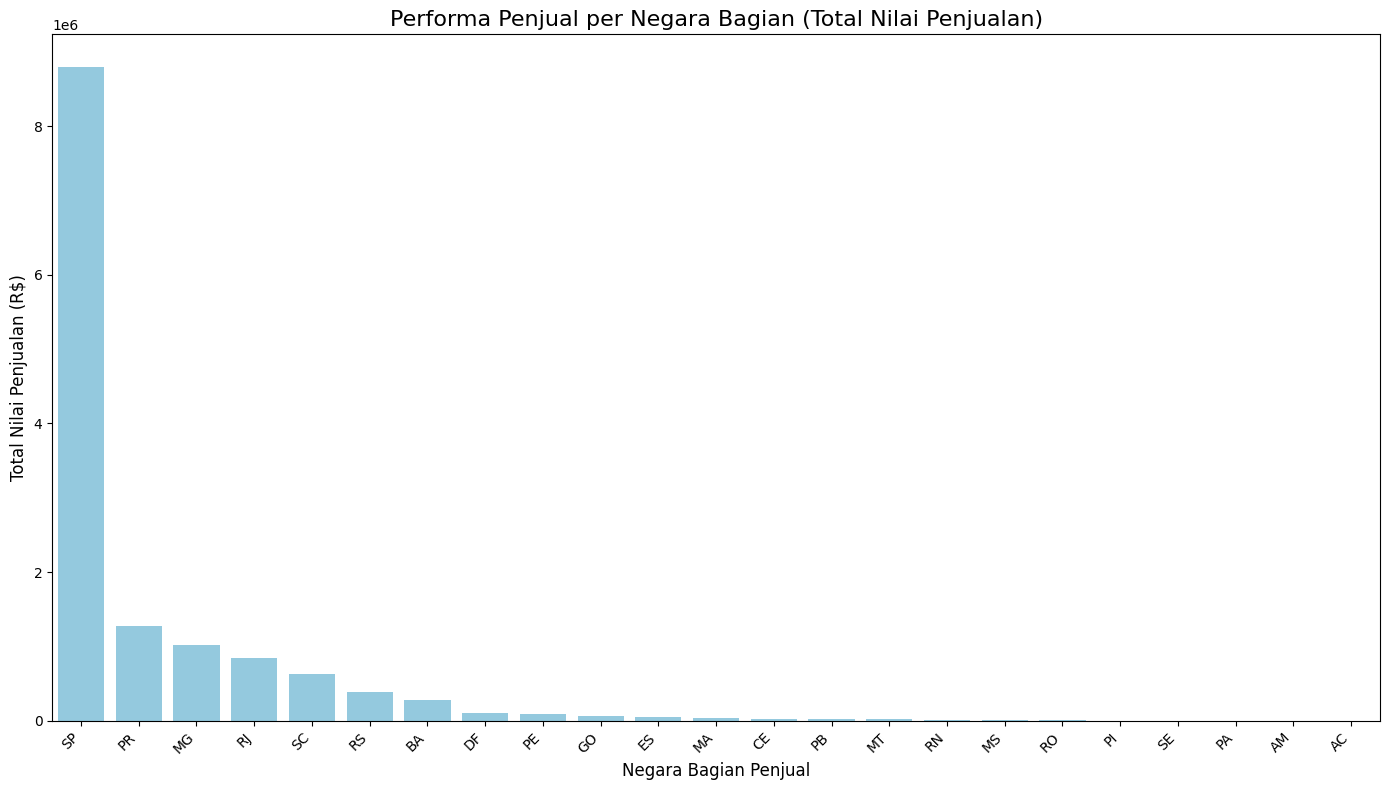

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gabungkan dataframe yang dibutuhkan
seller_orders = pd.merge(df_order_items, df_sellers, on='seller_id')
seller_reviews = pd.merge(df_orders[['order_id']], df_order_reviews[['order_id', 'review_score']], on='order_id')
seller_performance = pd.merge(seller_orders, seller_reviews, on='order_id', how='left')

# Visualisasi 1: Bar Chart untuk Performa Penjual per Negara Bagian (Nilai Penjualan)
seller_state_performance = seller_performance.groupby('seller_state').agg({'price': 'sum', 'order_id': 'count'}).reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='seller_state', y='price', data=seller_state_performance.sort_values('price', ascending=False), color='skyblue')
plt.title('Performa Penjual per Negara Bagian (Total Nilai Penjualan)', fontsize=16)
plt.xlabel('Negara Bagian Penjual', fontsize=12)
plt.ylabel('Total Nilai Penjualan (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

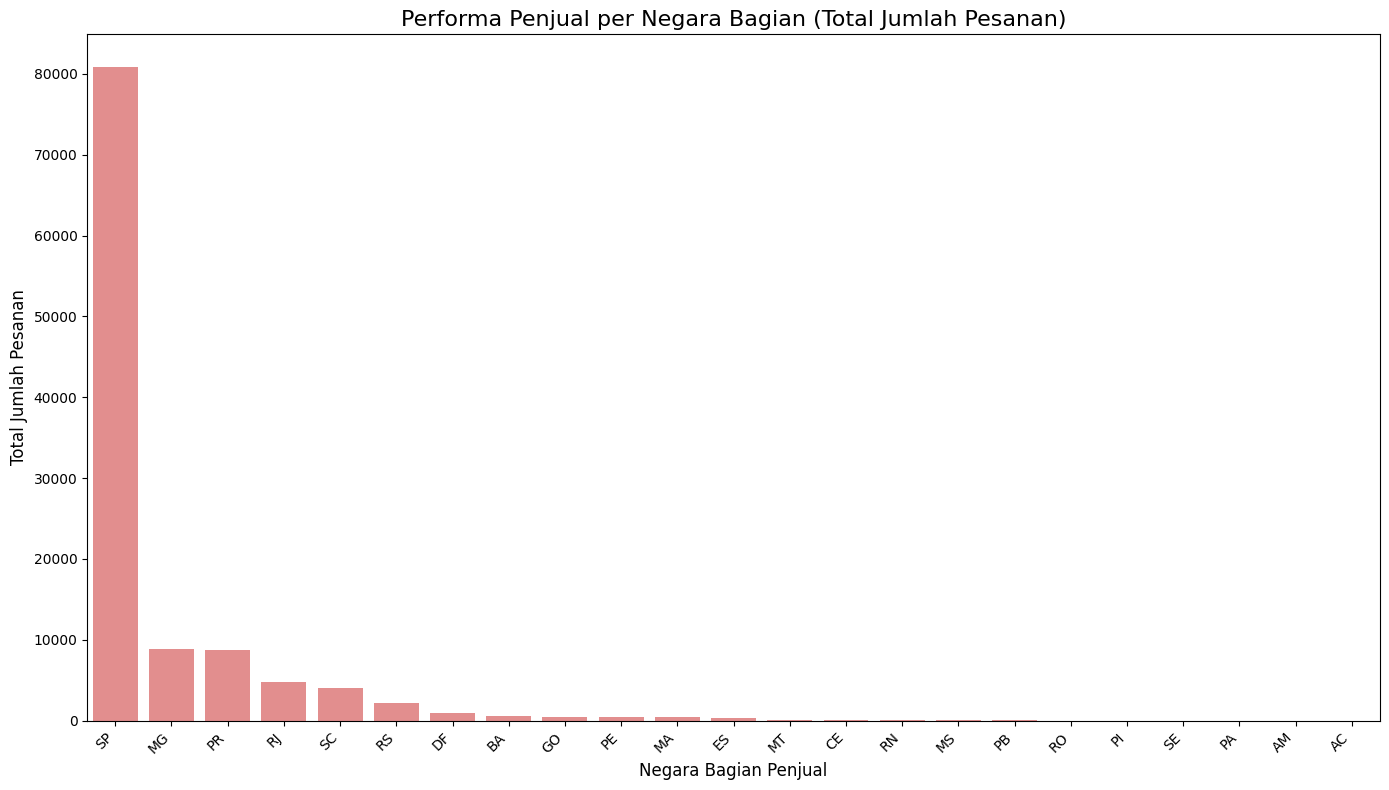

In [55]:
# Visualisasi 2: Bar Chart untuk Performa Penjual per Negara Bagian (Jumlah Pesanan)
plt.figure(figsize=(14, 8))
sns.barplot(x='seller_state', y='order_id', data=seller_state_performance.sort_values('order_id', ascending=False), color='lightcoral')
plt.title('Performa Penjual per Negara Bagian (Total Jumlah Pesanan)', fontsize=16)
plt.xlabel('Negara Bagian Penjual', fontsize=12)
plt.ylabel('Total Jumlah Pesanan', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

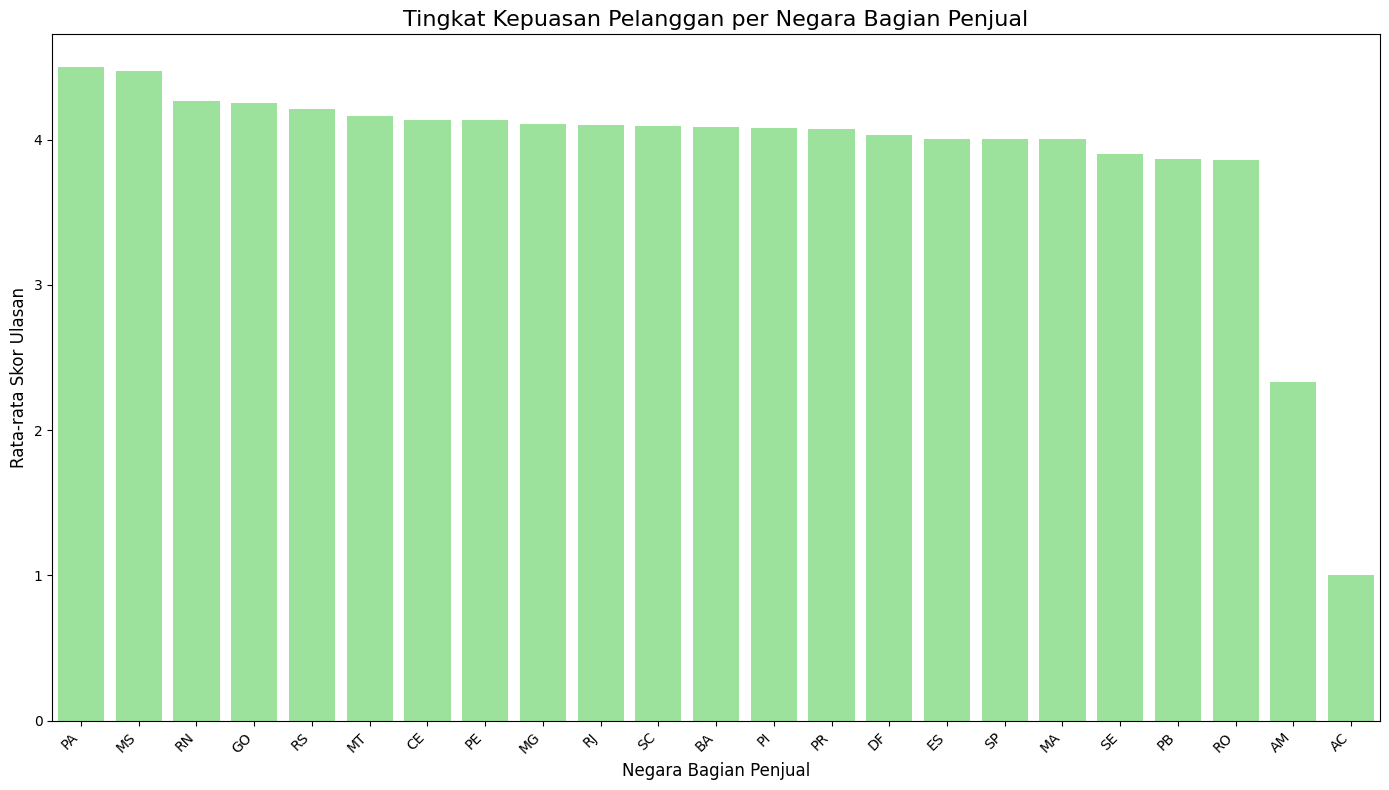

In [56]:
# Visualisasi 3: Bar Chart untuk Tingkat Kepuasan Pelanggan per Negara Bagian
seller_state_satisfaction = seller_performance.groupby('seller_state').agg({'review_score': 'mean'}).reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='seller_state', y='review_score', data=seller_state_satisfaction.sort_values('review_score', ascending=False), color='lightgreen')
plt.title('Tingkat Kepuasan Pelanggan per Negara Bagian Penjual', fontsize=16)
plt.xlabel('Negara Bagian Penjual', fontsize=12)
plt.ylabel('Rata-rata Skor Ulasan', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Bagaimana performa penjual berdasarkan lokasi, jumlah pesanan, dan nilai penjualan, serta penjual dari negara bagian mana yang memiliki tingkat kepuasan pelanggan tertinggi?**
- Dominasi SP dalam Penjualan: SP juga mendominasi dalam hal nilai penjualan dari sisi penjual.
- Kepuasan Pelanggan: Negara bagian PA dan MS memiliki tingkat kepuasan pelanggan tertinggi, sementara SP memiliki rating yang relatif baik tetapi tidak setinggi PA dan MS.
- Korelasi Rating dan Penjualan: Terdapat korelasi yang lemah antara rating dan nilai penjualan. Penjual dengan rating tinggi belum tentu memiliki nilai penjualan tertinggi.
- Potensi Penjualan Tinggi: Penjual dengan rating baik (4-5 dan 3-4) memiliki potensi untuk mencapai nilai penjualan yang sangat tinggi, meskipun ada juga yang memiliki nilai penjualan rendah.
- Mayoritas Penjual Berkualitas: Sebagian besar penjual (kategori rating 4-5) mampu memberikan layanan berkualitas tinggi.

## Pertanyaan ke - 3 : Bagaimana korelasi antara metode pembayaran, jumlah cicilan, dan nilai transaksi, serta metode pembayaran apa yang paling populer di berbagai negara bagian?


- Menggabungkan data pembayaran dengan data pesanan, lalu dengan data pelanggan
- Ini memungkinkan analisis metode pembayaran berdasarkan lokasi pelanggan

In [57]:
# Menggabungkan data pembayaran dengan pelanggan
payment_with_orders = pd.merge(df_order_payments, df_orders[['order_id', 'customer_id']], on='order_id')
payment_with_customers = pd.merge(payment_with_orders, df_customers[['customer_id', 'customer_state']], on='customer_id')

- Mengelompokkan data berdasarkan jenis pembayaran
- Menghitung berbagai statistik untuk setiap metode pembayaran, termasuk jumlah transaksi, nilai transaksi (rata-rata, median, min, max), dan statistik cicilan

In [58]:
# Statistik deskriptif pembayaran
payment_stats = df_order_payments.groupby('payment_type').agg({
    'order_id': 'count',
    'payment_value': ['mean', 'median', 'min', 'max'],
    'payment_installments': ['mean', 'median', 'max']
}).reset_index()

# Flatten MultiIndex columns
payment_stats.columns = ['_'.join(col).strip('_') for col in payment_stats.columns.values]
print("\n===== ANALISIS METODE PEMBAYARAN =====")
print("\nStatistik metode pembayaran:")
print(payment_stats)


===== ANALISIS METODE PEMBAYARAN =====

Statistik metode pembayaran:
  payment_type  order_id_count  payment_value_mean  payment_value_median  \
0       boleto           19784          145.034435                 93.89   
1  credit_card           76795          163.319021                106.87   
2   debit_card            1529          142.570170                 89.30   
3  not_defined               3            0.000000                  0.00   
4      voucher            5775           65.703354                 39.28   

   payment_value_min  payment_value_max  payment_installments_mean  \
0              11.62            7274.88                   1.000000   
1               0.01           13664.08                   3.507155   
2              13.38            4445.50                   1.000000   
3               0.00               0.00                   1.000000   
4               0.00            3184.34                   1.000000   

   payment_installments_median  payment_installments

- Menghitung jumlah penggunaan setiap metode pembayaran per negara bagian
- Membuat tabel pivot untuk mempermudah analisis

In [59]:
# Popularitas metode pembayaran per negara bagian
payment_by_state = payment_with_customers.groupby(['customer_state', 'payment_type']).size().reset_index(name='count')
payment_by_state_pivot = payment_by_state.pivot_table(
    index='customer_state',
    columns='payment_type',
    values='count',
    fill_value=0
)

Mengkonversi jumlah absolut menjadi persentase untuk melihat proporsi penggunaan metode pembayaran di setiap negara bagian

In [60]:
# Menghitung persentase penggunaan metode pembayaran per negara bagian
payment_by_state_pct = payment_by_state_pivot.div(payment_by_state_pivot.sum(axis=1), axis=0) * 100
print("\n===== ANALISIS METODE PEMBAYARAN =====")
print("\nMetode pembayaran paling populer per negara bagian:")
most_popular_payment = payment_by_state_pivot.idxmax(axis=1).reset_index()
most_popular_payment.columns = ['customer_state', 'most_popular_payment']
popular_payment_counts = payment_by_state_pivot.max(axis=1).reset_index()
popular_payment_counts.columns = ['customer_state', 'count']
most_popular_with_count = pd.merge(most_popular_payment, popular_payment_counts, on='customer_state')
print(most_popular_with_count)


===== ANALISIS METODE PEMBAYARAN =====

Metode pembayaran paling populer per negara bagian:
   customer_state most_popular_payment    count
0              AC          credit_card     61.0
1              AL          credit_card    341.0
2              AM          credit_card    124.0
3              AP          credit_card     47.0
4              BA          credit_card   2662.0
5              CE          credit_card   1091.0
6              DF          credit_card   1700.0
7              ES          credit_card   1573.0
8              GO          credit_card   1520.0
9              MA          credit_card    535.0
10             MG          credit_card   9070.0
11             MS          credit_card    519.0
12             MT          credit_card    659.0
13             PA          credit_card    728.0
14             PB          credit_card    428.0
15             PE          credit_card   1334.0
16             PI          credit_card    389.0
17             PR          credit_card   37

In [61]:
# ---------- Pertanyaan 3: Korelasi metode pembayaran, cicilan, dan nilai transaksi ----------

# Korelasi antara jumlah cicilan dan nilai transaksi
print("\nKorelasi antara jumlah cicilan dan nilai transaksi:")
installment_corr = df_order_payments[df_order_payments['payment_type'] == 'credit_card']['payment_installments'].corr(
    df_order_payments[df_order_payments['payment_type'] == 'credit_card']['payment_value']
)
print("\n===== ANALISIS METODE PEMBAYARAN =====")
print(f"Korelasi: {installment_corr}")


Korelasi antara jumlah cicilan dan nilai transaksi:

===== ANALISIS METODE PEMBAYARAN =====
Korelasi: 0.37649840070335056


- Menghitung rata-rata nilai transaksi dan jumlah transaksi untuk setiap jumlah cicilan
- Memungkinkan analisis bagaimana perilaku cicilan berhubungan dengan nilai transaksi

In [62]:
# Rata-rata nilai transaksi berdasarkan jumlah cicilan
avg_by_installment = df_order_payments[df_order_payments['payment_type'] == 'credit_card'].groupby(
    'payment_installments'
).agg({
    'payment_value': 'mean',
    'order_id': 'count'
}).reset_index()
print("\n===== ANALISIS METODE PEMBAYARAN =====")
print("\nRata-rata nilai transaksi berdasarkan jumlah cicilan:")
print(avg_by_installment)


===== ANALISIS METODE PEMBAYARAN =====

Rata-rata nilai transaksi berdasarkan jumlah cicilan:
    payment_installments  payment_value  order_id
0                      0      94.315000         2
1                      1      95.872930     25455
2                      2     127.228150     12413
3                      3     142.539317     10461
4                      4     163.976840      7098
5                      5     183.465222      5239
6                      6     209.849952      3920
7                      7     187.673672      1626
8                      8     307.737427      4268
9                      9     203.440870       644
10                    10     415.085837      5328
11                    11     124.932174        23
12                    12     321.678496       133
13                    13     150.462500        16
14                    14     167.962667        15
15                    15     445.553108        74
16                    16     292.694000         5
17   

Dari analisis ini, didapatkan insight tentang preferensi metode pembayaran (dominasi kartu kredit), pola cicilan, dan hubungan antara jumlah cicilan dengan nilai transaksi.

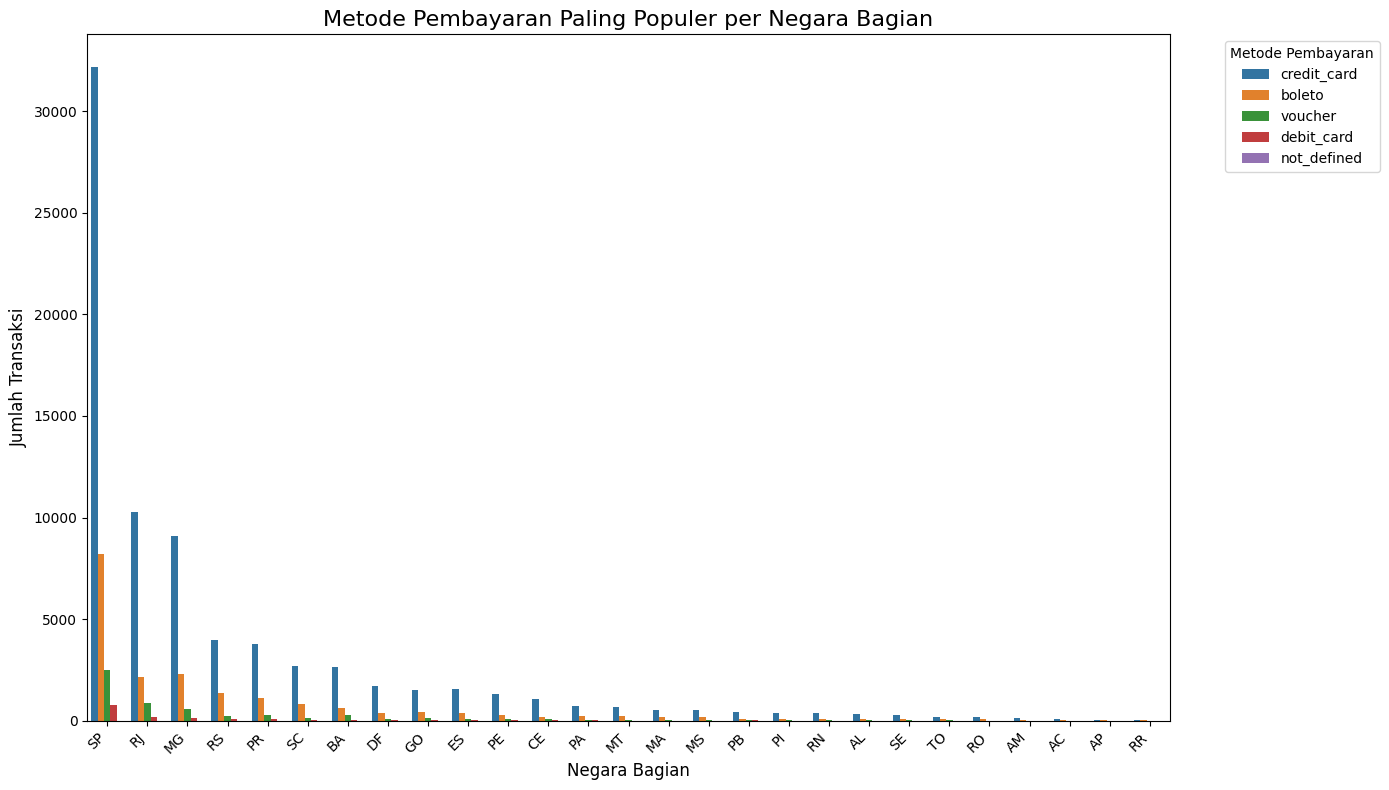

In [63]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menggabungkan data pembayaran dengan data orders dan customers
payment_with_orders = pd.merge(df_order_payments, df_orders[['order_id', 'customer_id']], on='order_id')
payment_with_customers = pd.merge(payment_with_orders, df_customers[['customer_id', 'customer_state']], on='customer_id')

# Visualisasi 1: Bar chart metode pembayaran paling populer per negara bagian
plt.figure(figsize=(14, 8))
sns.countplot(x='customer_state', hue='payment_type', data=payment_with_customers, order=payment_with_customers['customer_state'].value_counts().index)
plt.title('Metode Pembayaran Paling Populer per Negara Bagian', fontsize=16)
plt.xlabel('Negara Bagian', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metode Pembayaran', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

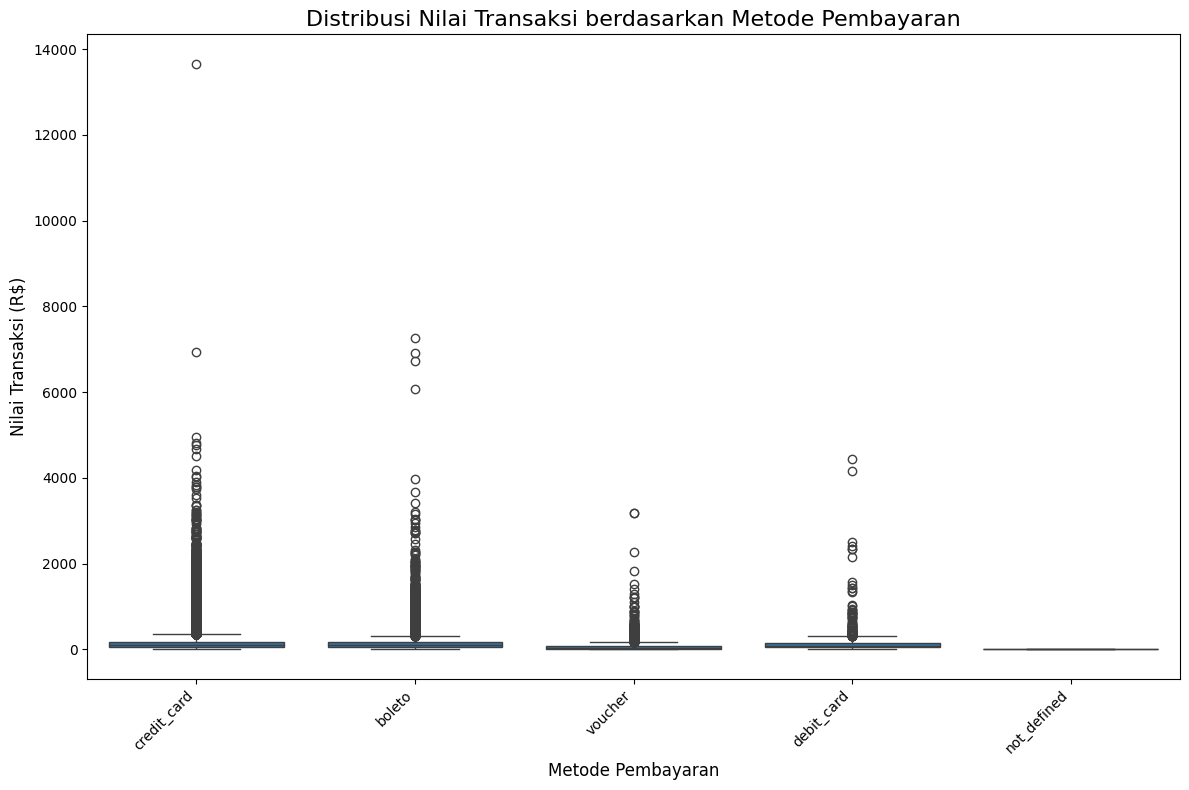

In [64]:
# Visualisasi 2: Box plot nilai transaksi berdasarkan metode pembayaran
plt.figure(figsize=(12, 8))
sns.boxplot(x='payment_type', y='payment_value', data=df_order_payments)
plt.title('Distribusi Nilai Transaksi berdasarkan Metode Pembayaran', fontsize=16)
plt.xlabel('Metode Pembayaran', fontsize=12)
plt.ylabel('Nilai Transaksi (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

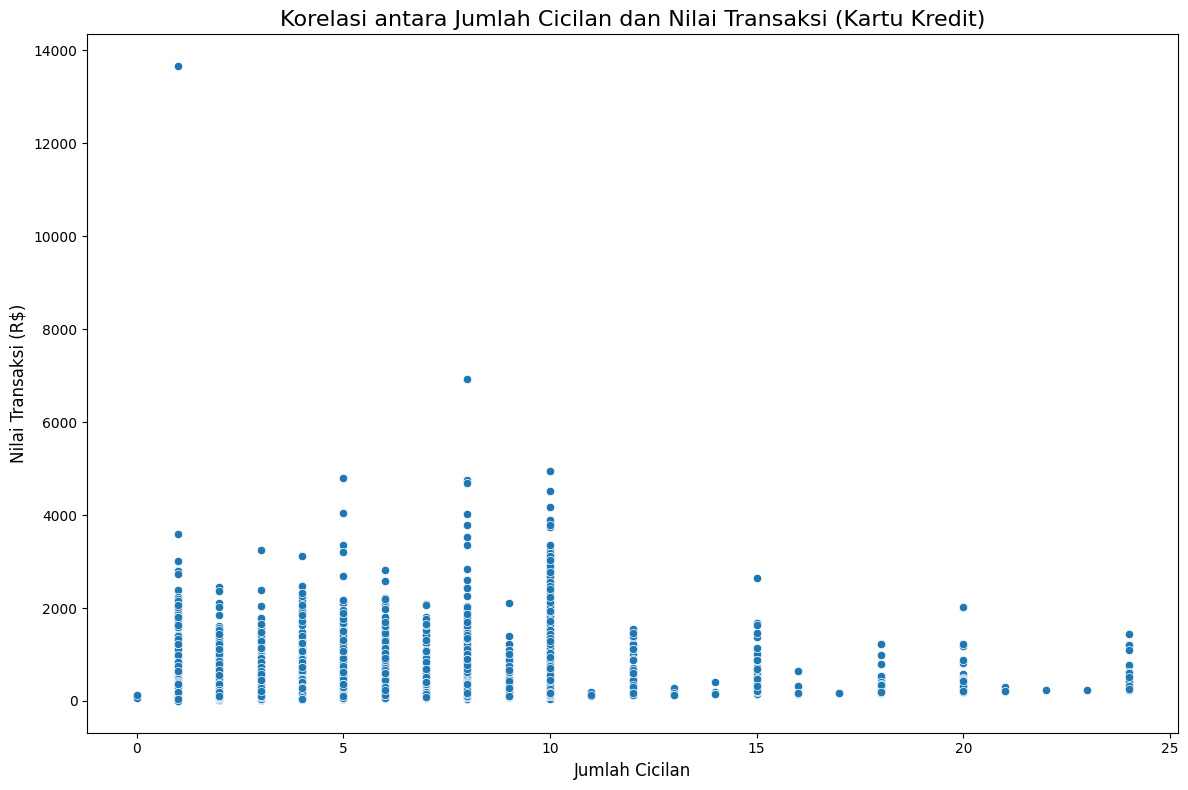

In [65]:
# Visualisasi 3: Scatter plot korelasi antara jumlah cicilan dan nilai transaksi (khusus kartu kredit)
credit_card_payments = df_order_payments[df_order_payments['payment_type'] == 'credit_card']
plt.figure(figsize=(12, 8))
sns.scatterplot(x='payment_installments', y='payment_value', data=credit_card_payments)
plt.title('Korelasi antara Jumlah Cicilan dan Nilai Transaksi (Kartu Kredit)', fontsize=16)
plt.xlabel('Jumlah Cicilan', fontsize=12)
plt.ylabel('Nilai Transaksi (R$)', fontsize=12)
plt.tight_layout()
plt.show()

## **Bagaimana korelasi antara metode pembayaran, jumlah cicilan, dan nilai transaksi, serta metode pembayaran apa yang paling populer di berbagai negara bagian?**

- Dominasi Kartu Kredit: Kartu kredit adalah metode pembayaran yang paling populer di Brazil.
- Korelasi Cicilan dan Nilai Transaksi: Terdapat korelasi positif yang lemah antara jumlah cicilan dan nilai transaksi untuk pembayaran dengan kartu kredit. Artinya, transaksi dengan nilai lebih tinggi cenderung menggunakan lebih banyak cicilan.
- Rata-rata Nilai Transaksi per Cicilan: Transaksi dengan cicilan lebih banyak cenderung memiliki nilai transaksi rata-rata yang lebih tinggi.

## Pertanyaan ke - 4 : Berdasarkan analisis RFM, bagaimana segmentasi pelanggan dapat membantu strategi pemasaran yang lebih personal, dan karakteristik apa yang dimiliki oleh pelanggan dengan nilai tertinggi?

- Menghitung total nilai pembayaran untuk setiap pesanan
- Menggabungkan data pesanan dengan nilai pembayaran

In [66]:
# Menggabungkan order dengan payment untuk mendapatkan nilai transaksi
order_payments = df_order_payments.groupby('order_id')['payment_value'].sum().reset_index()
orders_with_payments = pd.merge(df_orders, order_payments, on='order_id')

Menentukan tanggal terbaru dalam dataset sebagai referensi untuk perhitungan recency

In [67]:
# Mengambil tanggal terakhir dalam dataset untuk kalkulasi recency
max_date = df_orders['order_purchase_timestamp'].max()
print("\n===== ANALISIS RFM DAN SEGMENTASI PELANGGAN =====")
print(f"Tanggal terakhir dalam dataset: {max_date}")


===== ANALISIS RFM DAN SEGMENTASI PELANGGAN =====
Tanggal terakhir dalam dataset: 2018-10-17 17:30:18


Menentukan tanggal terbaru dalam dataset sebagai referensi untuk perhitungan recency

In [68]:
# Menghitung RFM untuk setiap pelanggan
rfm = orders_with_payments.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (max_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'payment_value': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

Menghitung komponen RFM untuk setiap pelanggan:

- Recency: Jumlah hari sejak pembelian terakhir (nilai kecil = lebih baru)
- Frequency: Jumlah pesanan total
- Monetary: Total nilai transaksi

In [69]:
# Membuat kuintil untuk setiap komponen RFM
rfm['r_score'] = pd.qcut(rfm['recency'], q=5, labels=[5, 4, 3, 2, 1])  # 5 adalah yang terbaru
rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])  # 5 adalah yang paling sering
rfm['m_score'] = pd.qcut(rfm['monetary'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])  # 5 adalah yang paling tinggi

- Membagi setiap komponen RFM menjadi 5 kuintil (1-5)

- Menentukan skor untuk setiap komponen dengan mempertimbangkan bahwa:
Untuk recency, nilai kecil (lebih baru)

*  Untuk recency, nilai kecil (lebih baru) mendapat skor tinggi
* Untuk frequency dan monetary, nilai tinggi mendapat skor tinggi

In [70]:
# Menggabungkan skor RFM menjadi satu nilai
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)

Menggabungkan tiga skor menjadi satu string (misal: "535" untuk pelanggan dengan recency tinggi, frequency sedang, monetary tinggi)

In [71]:
# Membuat segmen berdasarkan RFM
def get_segment(rfm_score):
    r = int(rfm_score[0])
    f = int(rfm_score[1])
    m = int(rfm_score[2])

    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Loyal Customers'
    elif r >= 3 and f >= 1 and m >= 2:
        return 'Potential Loyalists'
    elif r >= 4 and f <= 2 and m <= 2:
        return 'New Customers'
    elif r < 2 and f > 2 and m > 2:
        return 'At Risk'
    elif r < 2 and f <= 2 and m <= 2:
        return 'Hibernating'
    elif r >= 2 and f <= 2 and m <= 2:
        return 'Needs Attention'
    else:
        return 'Others'

rfm['segment'] = rfm['rfm_score'].apply(get_segment)

Mendefinisikan fungsi untuk mengkonversi skor RFM ke segmen pelanggan
Menentukan berbagai segmen seperti Champions, Loyal Customers, At Risk, dll. berdasarkan kombinasi skor RFM

In [72]:
# Ringkasan segmen
segment_summary = rfm.groupby('segment').agg({
    'customer_id': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).reset_index()

segment_summary = segment_summary.sort_values('monetary', ascending=False)
print("\n===== ANALISIS RFM DAN SEGMENTASI PELANGGAN =====")
print("\nRingkasan segmen pelanggan:")
print(segment_summary)

# Karakteristik segmen Champions
champions = rfm[rfm['segment'] == 'Champions']
print("\nKarakteristik segmen Champions:")
print(champions.describe())


===== ANALISIS RFM DAN SEGMENTASI PELANGGAN =====

Ringkasan segmen pelanggan:
               segment  customer_id     recency  frequency    monetary
1            Champions         6511  141.880356        1.0  297.929183
0              At Risk         6939  526.783542        1.0  235.554008
3      Loyal Customers        15378  203.095851        1.0  201.502450
7  Potential Loyalists        25935  185.343358        1.0  157.621589
6               Others        33322  375.450933        1.0  141.172024
2          Hibernating         3251  525.628730        1.0   54.317118
4      Needs Attention         4910  336.240733        1.0   49.357544
5        New Customers         3194  140.088917        1.0   39.092267

Karakteristik segmen Champions:
           recency  frequency     monetary
count  6511.000000     6511.0  6511.000000
mean    141.880356        1.0   297.929183
std      52.523400        0.0   322.233412
min      36.000000        1.0   128.740000
25%      91.000000        1.0   1

Menambahkan informasi lokasi ke data RFM untuk analisis geografis



In [73]:
# Menggabungkan dengan data lokasi pelanggan
rfm_with_location = pd.merge(rfm, df_customers[['customer_id', 'customer_state', 'customer_city']], on='customer_id')

- Menganalisis distribusi segmen pelanggan berdasarkan negara bagian
- Mengidentifikasi negara bagian dengan konsentrasi segmen pelanggan bernilai tinggi

In [74]:
# Distribusi segmen per negara bagian
segment_by_state = rfm_with_location.groupby(['customer_state', 'segment']).size().reset_index(name='count')
print("\n===== ANALISIS RFM DAN SEGMENTASI PELANGGAN =====")
print("\nNegara bagian dengan jumlah pelanggan Champions terbanyak:")
champions_by_state = segment_by_state[segment_by_state['segment'] == 'Champions'].sort_values('count', ascending=False)
print(champions_by_state.head())


===== ANALISIS RFM DAN SEGMENTASI PELANGGAN =====

Negara bagian dengan jumlah pelanggan Champions terbanyak:
    customer_state    segment  count
197             SP  Champions   2526
80              MG  Champions    814
144             RJ  Champions    795
173             RS  Champions    344
136             PR  Champions    328


In [75]:
# Menampilkan karakteristik pelanggan dengan nilai tertinggi (Champions)
champions_characteristics = rfm[rfm['segment'] == 'Champions'].describe()
print("\nKarakteristik Pelanggan dengan Nilai Tertinggi (Champions):")
print(champions_characteristics)


Karakteristik Pelanggan dengan Nilai Tertinggi (Champions):
           recency  frequency     monetary
count  6511.000000     6511.0  6511.000000
mean    141.880356        1.0   297.929183
std      52.523400        0.0   322.233412
min      36.000000        1.0   128.740000
25%      91.000000        1.0   158.760000
50%     145.000000        1.0   201.340000
75%     187.000000        1.0   307.530000
max     229.000000        1.0  7274.880000


Dari analisis RFM ini, diperoleh insight tentang segmentasi pelanggan, karakteristik setiap segmen, dan distribusi geografis segmen, yang dapat digunakan untuk strategi pemasaran dan retensi.

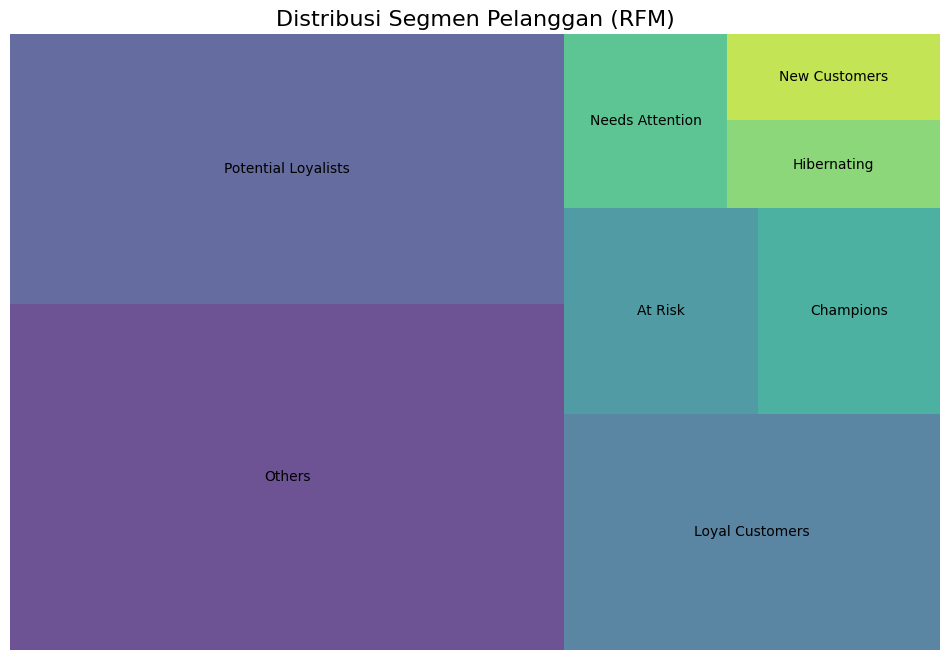

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# Visualisasi 1: Treemap untuk Distribusi Segmen Pelanggan
segment_counts = rfm['segment'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
squarify.plot(sizes=segment_counts, label=segment_counts.index, alpha=.8, color=sns.color_palette("viridis", len(segment_counts)))
plt.title('Distribusi Segmen Pelanggan (RFM)', fontsize=16)
plt.axis('off')
plt.show()

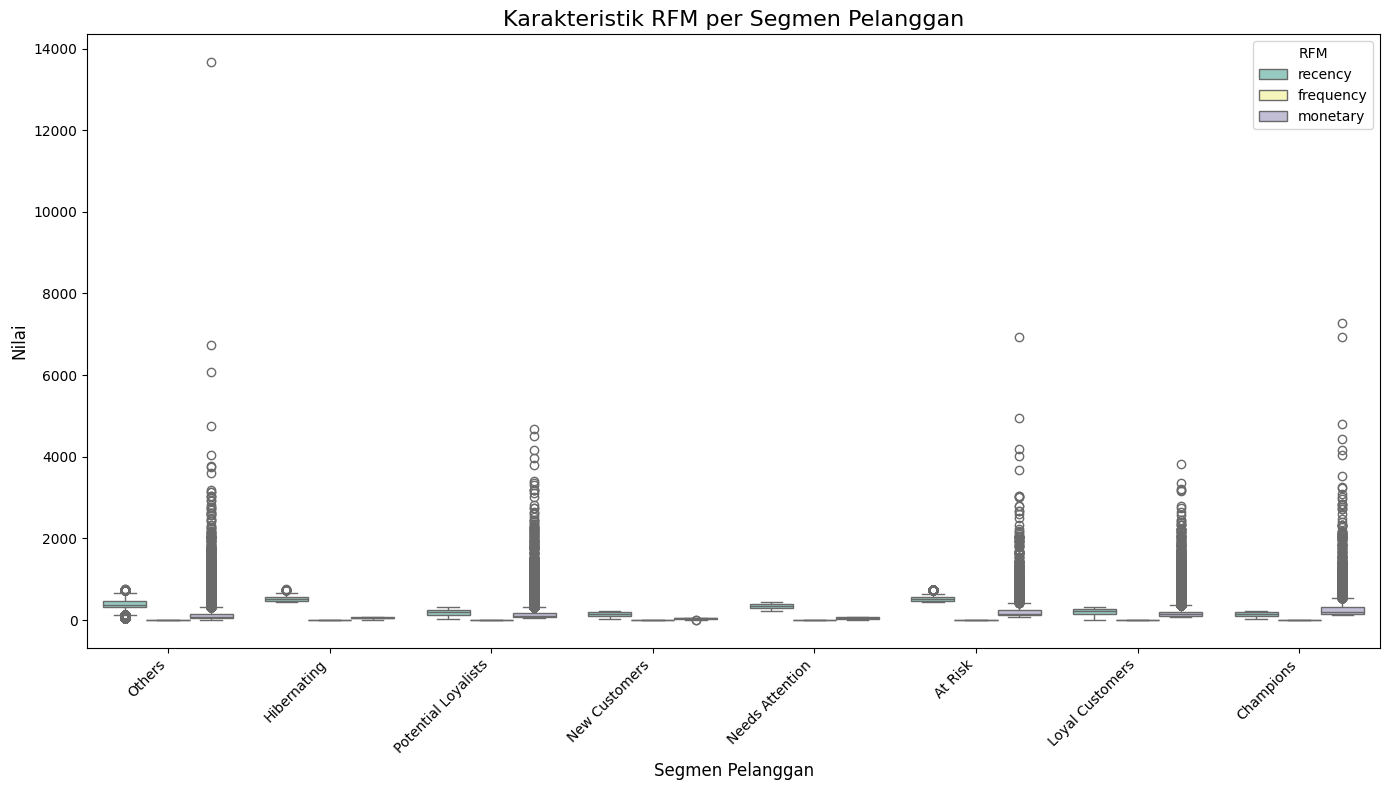

In [78]:
# Visualisasi 2: Box Plot untuk Karakteristik RFM per Segmen
rfm_melted = pd.melt(rfm, id_vars=['segment'], value_vars=['recency', 'frequency', 'monetary'], var_name='RFM', value_name='Value')
plt.figure(figsize=(14, 8))
sns.boxplot(x='segment', y='Value', hue='RFM', data=rfm_melted, palette="Set3")
plt.title('Karakteristik RFM per Segmen Pelanggan', fontsize=16)
plt.xlabel('Segmen Pelanggan', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

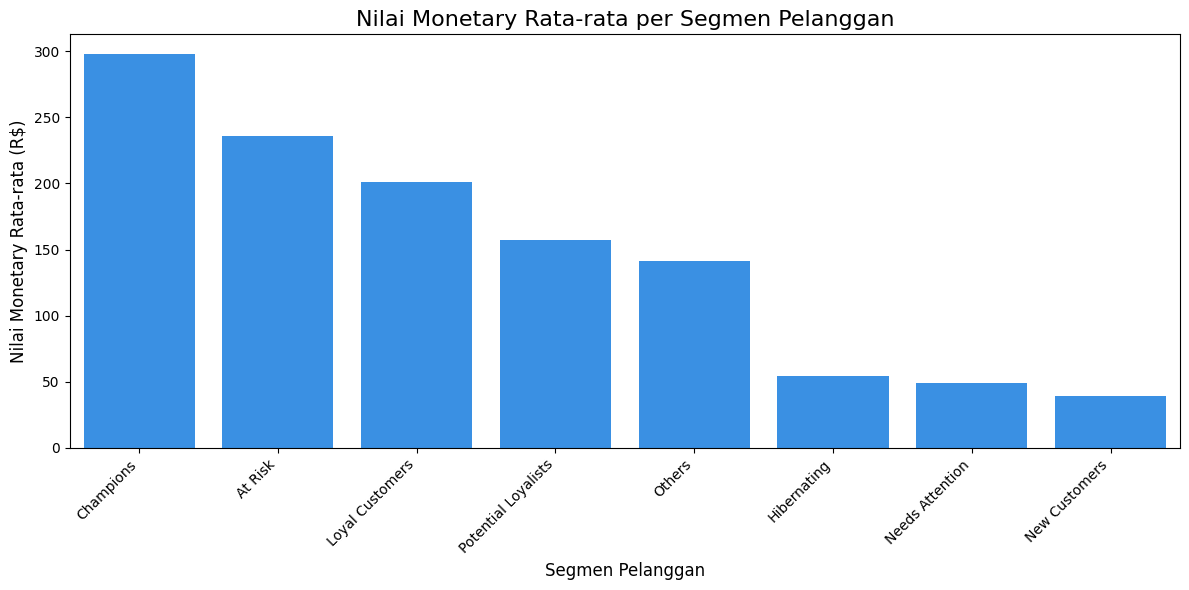

In [79]:
# Visualisasi 3: Bar Chart untuk Nilai Monetary Rata-rata per Segmen
segment_monetary = rfm.groupby('segment')['monetary'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='segment', y='monetary', data=segment_monetary, color='dodgerblue')
plt.title('Nilai Monetary Rata-rata per Segmen Pelanggan', fontsize=16)
plt.xlabel('Segmen Pelanggan', fontsize=12)
plt.ylabel('Nilai Monetary Rata-rata (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Berdasarkan analisis RFM, bagaimana segmentasi pelanggan dapat membantu strategi pemasaran yang lebih personal, dan karakteristik apa yang dimiliki oleh pelanggan dengan nilai tertinggi?**

- Segmentasi Pelanggan: Analisis RFM berhasil mengelompokkan pelanggan ke dalam berbagai segmen seperti Champions, Loyal Customers, At Risk, dll.
- Karakteristik Champions: Segmen Champions memiliki nilai recency, frequency, dan monetary yang tinggi, menunjukkan bahwa mereka adalah pelanggan yang paling berharga.
- Distribusi Geografis: SP memiliki jumlah pelanggan Champions terbanyak.
- Strategi Pemasaran: Segmentasi RFM dapat membantu dalam merancang strategi pemasaran yang lebih personal, misalnya dengan memberikan penawaran khusus kepada pelanggan At Risk untuk mencegah mereka churn.

## Kesimpulan

- Bagaimana pola pembelian pelanggan berdasarkan lokasi geografis di Brazil dari waktu ke waktu, dan area mana yang memiliki nilai transaksi tertinggi?
- Bagaimana performa penjual berdasarkan lokasi, jumlah pesanan, dan nilai penjualan, serta penjual dari negara bagian mana yang memiliki tingkat kepuasan pelanggan tertinggi?
- Bagaimana korelasi antara metode pembayaran, jumlah cicilan, dan nilai transaksi, serta metode pembayaran apa yang paling populer di berbagai negara bagian?
- Berdasarkan analisis RFM, bagaimana segmentasi pelanggan dapat membantu strategi pemasaran yang lebih personal, dan karakteristik apa yang dimiliki oleh pelanggan dengan nilai tertinggi?

## 1. Pola Pembelian Pelanggan Berdasarkan Lokasi Geografis
São Paulo (SP) merupakan pasar e-commerce terbesar dan teraktif di Brazil. Konsentrasi ekonomi dan populasi yang tinggi di SP menjadi faktor pendorong utama. Meskipun demikian, potensi pasar di negara bagian lain tetap perlu diperhatikan, terutama untuk strategi ekspansi dan diversifikasi bisnis. Penting juga untuk memahami pola musiman dalam pembelian dan mengantisipasinya dengan strategi pemasaran yang tepat.

## 2. Performa Penjual Berdasarkan Lokasi dan Kepuasan Pelanggan
Meskipun SP mendominasi dalam hal nilai penjualan, penjual dari negara bagian lain, seperti PA dan MS, menunjukkan performa yang baik dalam hal kepuasan pelanggan. Hal ini menunjukkan pentingnya tidak hanya fokus pada volume penjualan tetapi juga pada kualitas layanan dan kepuasan pelanggan. Penjual perlu berupaya untuk meningkatkan rating mereka karena hal ini dapat berdampak positif pada penjualan dalam jangka panjang.

## 3. Korelasi Metode Pembayaran, Cicilan, dan Nilai Transaksi
Kartu kredit merupakan metode pembayaran yang paling umum digunakan di platform e-commerce di Brazil. Penawaran program cicilan yang menarik dapat menjadi strategi untuk mendorong transaksi dengan nilai yang lebih tinggi. Pemahaman preferensi metode pembayaran di setiap negara bagian dapat membantu dalam optimasi proses pembayaran dan meningkatkan konversi penjualan.

## 4. Analisis RFM dan Segmentasi Pelanggan
Analisis RFM memberikan informasi berharga untuk segmentasi pelanggan dan personalisasi strategi pemasaran. Segmen Champions merupakan pelanggan yang paling berharga dan perlu dijaga loyalitasnya. Strategi retensi dan cross-selling dapat diterapkan untuk segmen ini. Segmen lain, seperti At Risk dan Needs Attention, memerlukan pendekatan yang berbeda untuk meningkatkan engagement dan mencegah churn. Dengan memahami karakteristik setiap segmen, bisnis dapat mengoptimalkan strategi pemasaran dan meningkatkan profitabilitas.